In [2]:
import os
import itertools
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [5]:
os.chdir("..")

# Parameters

In [3]:
file = "data/processed/raw/train_s_aureus_driams.csv"

output_folder = "exploration/outputs/"
file_name_ext = os.path.basename(file)
file_name = os.path.splitext(file_name_ext)[0].replace("train_", "")
base_name = output_folder+file_name

# Load

In [6]:
train_bac = pd.read_csv(file)
train_bac

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9994,9995,9996,9997,9998,9999,Oxacillin,Vancomycin,Clindamycin,Fusidic acid
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638,0.0,0.0,0.0,0.0
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504,0.0,0.0,0.0,0.0
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117,0.0,0.0,0.0,0.0
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919,0.0,0.0,0.0,0.0
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238,0.0,0.0,1.0,0.0
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142,0.0,0.0,1.0,0.0
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744,0.0,0.0,0.0,0.0
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402,1.0,0.0,1.0,0.0


In [7]:
malditof = train_bac[train_bac.columns.drop(list(train_bac.filter(regex='[^0-9]')))]
malditof

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.026481,0.037749,0.037821,0.037966,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.025359,0.025852,0.021612,0.014496,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.025808,0.021277,0.027015,0.024620,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.048250,0.046099,0.044124,0.051312,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.203770,0.188286,0.223548,0.236769,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.021095,0.016472,0.022287,0.021169,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.066203,0.082819,0.081270,0.082375,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.003815,0.005948,0.008330,0.006903,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.030296,0.033173,0.037821,0.049241,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402


In [8]:
antibiotics = train_bac.columns.drop(malditof.columns)
antibiotics

Index(['Oxacillin', 'Vancomycin', 'Clindamycin', 'Fusidic acid'], dtype='object')

In [9]:
train_bac[antibiotics] = train_bac[antibiotics].replace([0.0, 1.0], ["S", "R"])
train_bac

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,9994,9995,9996,9997,9998,9999,Oxacillin,Vancomycin,Clindamycin,Fusidic acid
0,0.018721,0.016147,0.016983,0.021218,0.020846,0.019784,0.019405,0.023356,0.026224,0.026569,...,0.030364,0.037545,0.040851,0.034176,0.046110,0.025638,S,S,S,S
1,0.009001,0.007475,0.006874,0.008575,0.009539,0.007894,0.008314,0.008013,0.008664,0.008923,...,0.024966,0.027437,0.026541,0.022940,0.020572,0.032504,S,S,S,S
2,0.022354,0.020220,0.020910,0.024631,0.021436,0.021197,0.020229,0.018818,0.018637,0.018815,...,0.022942,0.026715,0.032045,0.030431,0.029085,0.013117,S,S,S,S
3,0.017619,0.016073,0.016407,0.018011,0.019364,0.018950,0.017607,0.019116,0.023623,0.024492,...,0.047458,0.049338,0.055039,0.054541,0.058643,0.058919,S,S,S,S
4,0.008264,0.008229,0.006753,0.006657,0.010107,0.007039,0.008250,0.010670,0.008134,0.006513,...,0.217499,0.187244,0.216243,0.221910,0.226531,0.221965,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.056616,0.039011,0.040380,0.048517,0.050865,0.047771,0.049312,0.048257,0.049417,0.049000,...,0.023617,0.033694,0.021037,0.018727,0.010641,0.009238,S,S,R,S
2820,0.125837,0.107712,0.109186,0.107613,0.109855,0.105060,0.099640,0.104169,0.120303,0.125067,...,0.083446,0.096510,0.084883,0.092228,0.085599,0.042142,S,S,R,S
2821,0.000000,0.000000,0.035603,0.039994,0.042372,0.046666,0.045781,0.043914,0.039875,0.037170,...,0.008322,0.011071,0.010274,0.004682,0.003547,0.001744,S,S,S,S
2822,0.005443,0.005998,0.003670,0.005588,0.006124,0.005019,0.004853,0.005400,0.004169,0.005151,...,0.039586,0.050542,0.039139,0.046816,0.043036,0.037402,R,S,R,S


In [10]:
profile = train_bac[antibiotics]
profile

,Oxacillin,Vancomycin,Clindamycin,Fusidic acid
0,S,S,S,S
1,S,S,S,S
2,S,S,S,S
3,S,S,S,S
4,S,S,S,S
...,...,...,...,...
2819,S,S,R,S
2820,S,S,R,S
2821,S,S,S,S
2822,R,S,R,S


# Exploration

## Class distribution per antibiotic

ValueError: Unknown format code 'd' for object of type 'float'

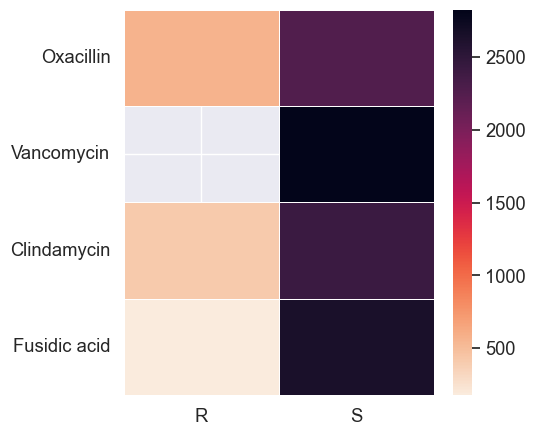

In [11]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.heatmap(train_bac[antibiotics].apply(pd.Series.value_counts).T, annot=True, fmt="d", linewidth=.5, cmap="rocket_r")

In [12]:
train_bac[antibiotics].apply(pd.Series.value_counts).T

,R,S
Oxacillin,564.0,2260.0
Vancomycin,NaN,2824.0
Clindamycin,408.0,2416.0
Fusidic acid,180.0,2644.0


## Aggregate class distribution

In [43]:
# The number of rows for each combination of label values is counted.
value_counts = train_bac[antibiotics].value_counts()
df_value_counts = value_counts.rename("Count").to_frame().reset_index()

# Every combination possible is calculated, so that they are included in the table even if not present in the dataset.
options = profile[antibiotics[0]].unique()
combined = []
for i in range(len(antibiotics)):
    combined.append(options)
combinations = list(itertools.product(*combined))
df_combinations = pd.DataFrame(columns=antibiotics, data=combinations)

# The count is combined to the list of combinations.
df_combination_count = df_combinations.merge(df_value_counts, how="left").fillna(0).astype({"Count": "int"})
df_combination_count.sort_values(by=["Count"], ascending=False)

,Ciprofloxacin,Ceftriaxone,Piperacillin-Tazobactam,Cefepime,Count
0,S,S,S,S,2388
8,R,S,S,S,421
13,R,R,S,R,393
5,S,R,S,R,115
12,R,R,S,S,92
15,R,R,R,R,81
2,S,S,R,S,77
10,R,S,R,S,53
4,S,R,S,S,29
7,S,R,R,R,25


Classes with 0 instances.

In [44]:
df_combination_count.loc[df_combination_count["Count"] == 0].drop("Count", axis=1)

,Ciprofloxacin,Ceftriaxone,Piperacillin-Tazobactam,Cefepime
1,S,S,S,R
3,S,S,R,R
6,S,R,R,S
9,R,S,S,R
11,R,S,R,R


## Antibiotic Correlation

<Axes: >

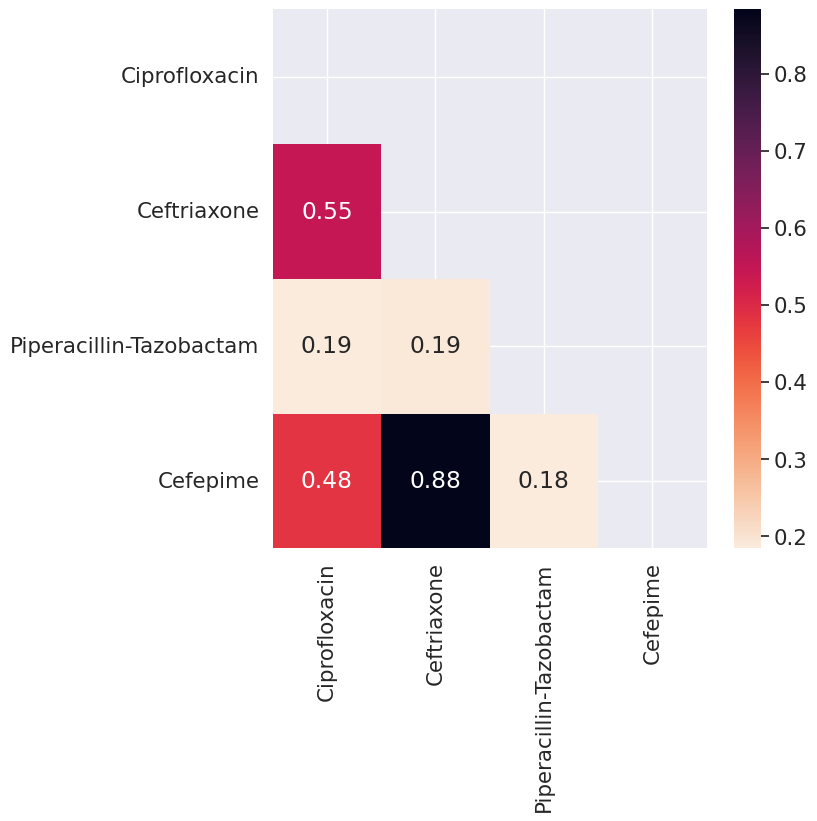

In [45]:
numeric_profile = profile.replace({'S': 0, 'R': 1})

sns.set(rc={'figure.figsize':(7, 7)})
corr = numeric_profile.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(corr, mask=mask, annot=True, cmap="rocket_r")

## Mean mass spectra

In [46]:
meltdata = train_bac.melt(antibiotics, var_name='Da', value_name='Value')
meltdata["Da"] = meltdata["Da"].astype(str).astype(int)
meltdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29528000 entries, 0 to 29527999
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Ciprofloxacin            object 
 1   Ceftriaxone              object 
 2   Piperacillin-Tazobactam  object 
 3   Cefepime                 object 
 4   Da                       int64  
 5   Value                    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ GB


In [47]:
linewidth = 2
label_size = 28
axis_tick_size = 28
legend_size = '24'
y_label_format = '{:,.3f}'
class_count = profile.value_counts().count()
palette = sns.color_palette("tab20")[:class_count]
sns.set(font_scale=1)
lower_limit = int(malditof.columns[0])
upper_limit = int(malditof.columns[-1])
jump = int((upper_limit - lower_limit + 1) / 20)


In [51]:
def one_antibiotic_lineplot(antibiotic):
    fig, axes = plt.subplots(1, 1, figsize=(30, 20))
    
    sns.set(font_scale = 2)
    line = sns.lineplot(ax=axes, data=meltdata, x="Da", y="Value", hue=antibiotic, 
                            palette={"S": "C0", "R": "C1"}, linewidth=linewidth)
    line.set(xticks=np.arange(lower_limit, upper_limit, jump))
    line.set_xlabel("Da", fontsize=label_size)
    line.set_ylabel("Value", fontsize=label_size)

    line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
    ticks_loc = axes.get_yticks()
    axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

    plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
    plt.setp(line.get_legend().get_title(), fontsize=legend_size) 
    axes.margins(x=0.005)

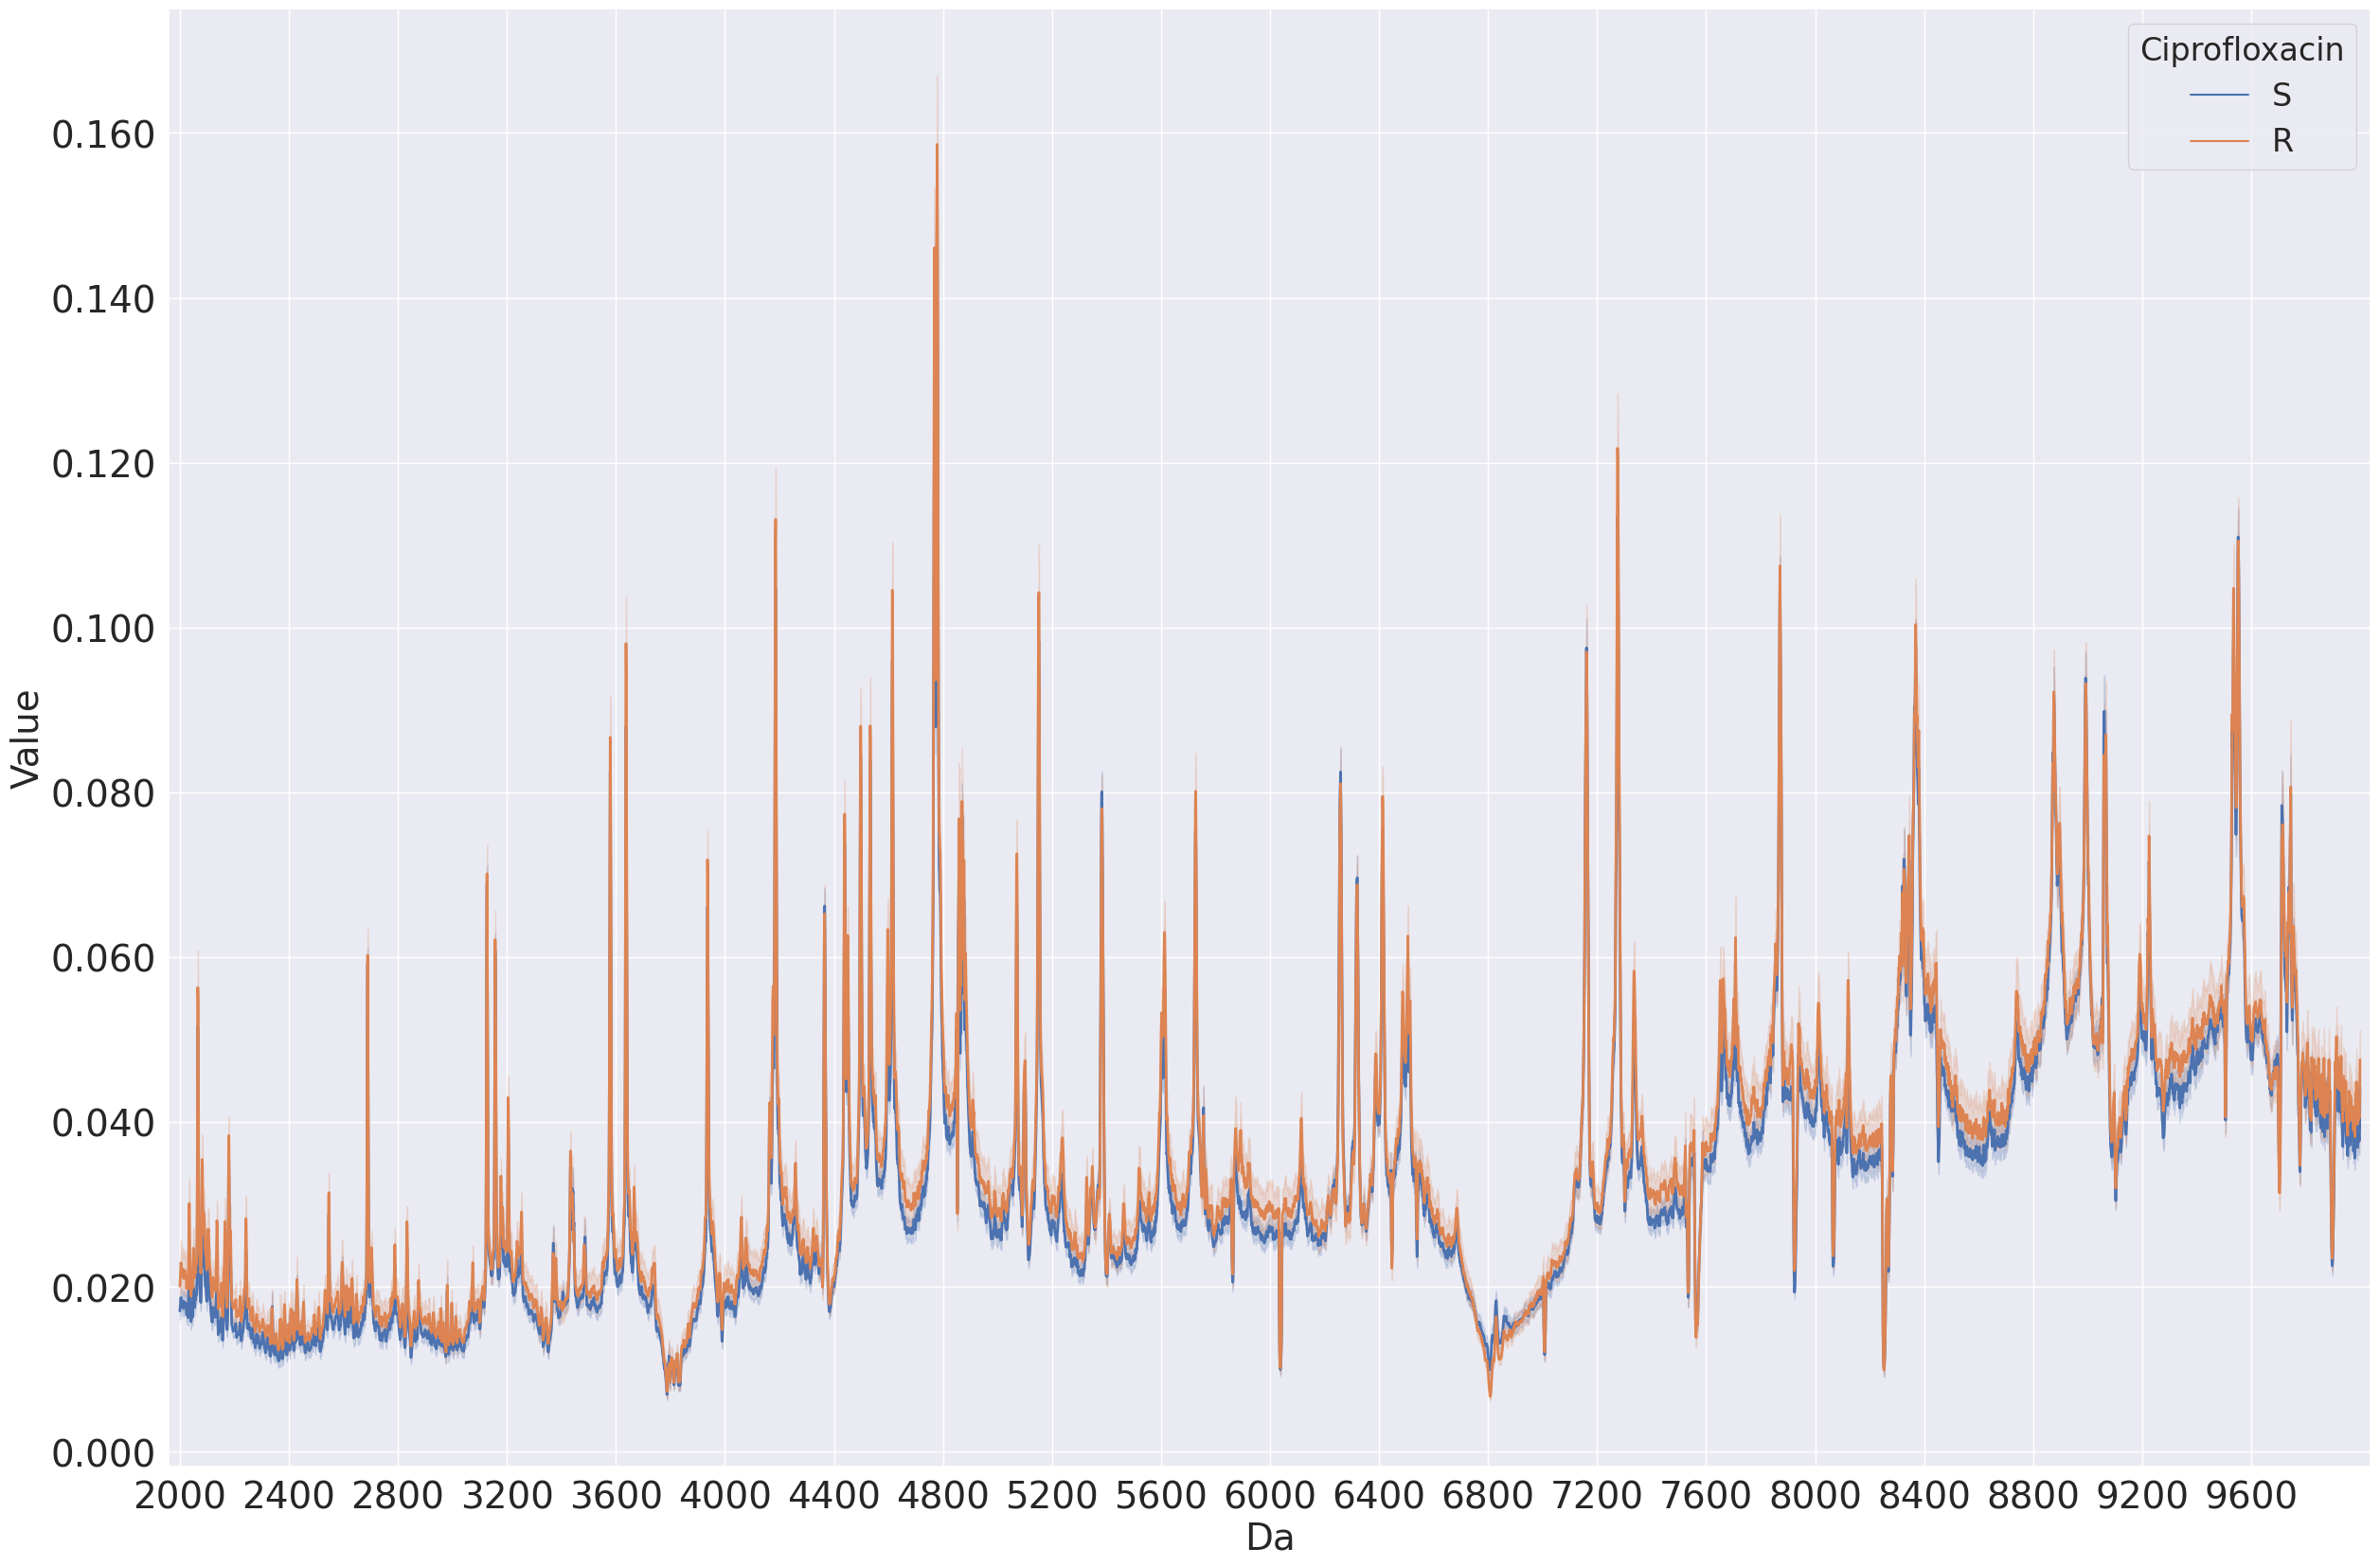

In [52]:
one_antibiotic_lineplot(antibiotics[0])

In [17]:
meltdata_lps = meltdata
meltdata_lps["Class"] = meltdata[antibiotics].agg(''.join, axis=1)
meltdata_lps["Class"] = meltdata_lps["Class"].astype(str)
meltdata_lps

,Ciprofloxacin,Ceftriaxone,Piperacillin-Tazobactam,Cefepime,Da,Value,Class
0,S,S,S,S,2000,0.001530,SSSS
1,R,R,S,R,2000,0.012835,RRSR
2,S,R,S,R,2000,0.036591,SRSR
3,S,S,S,S,2000,0.017140,SSSS
4,S,S,R,S,2000,0.003033,SSRS
...,...,...,...,...,...,...,...
29527995,S,S,S,S,9999,0.082976,SSSS
29527996,R,R,S,R,9999,0.009809,RRSR
29527997,S,S,R,S,9999,0.003650,SSRS
29527998,S,S,S,S,9999,0.029474,SSSS


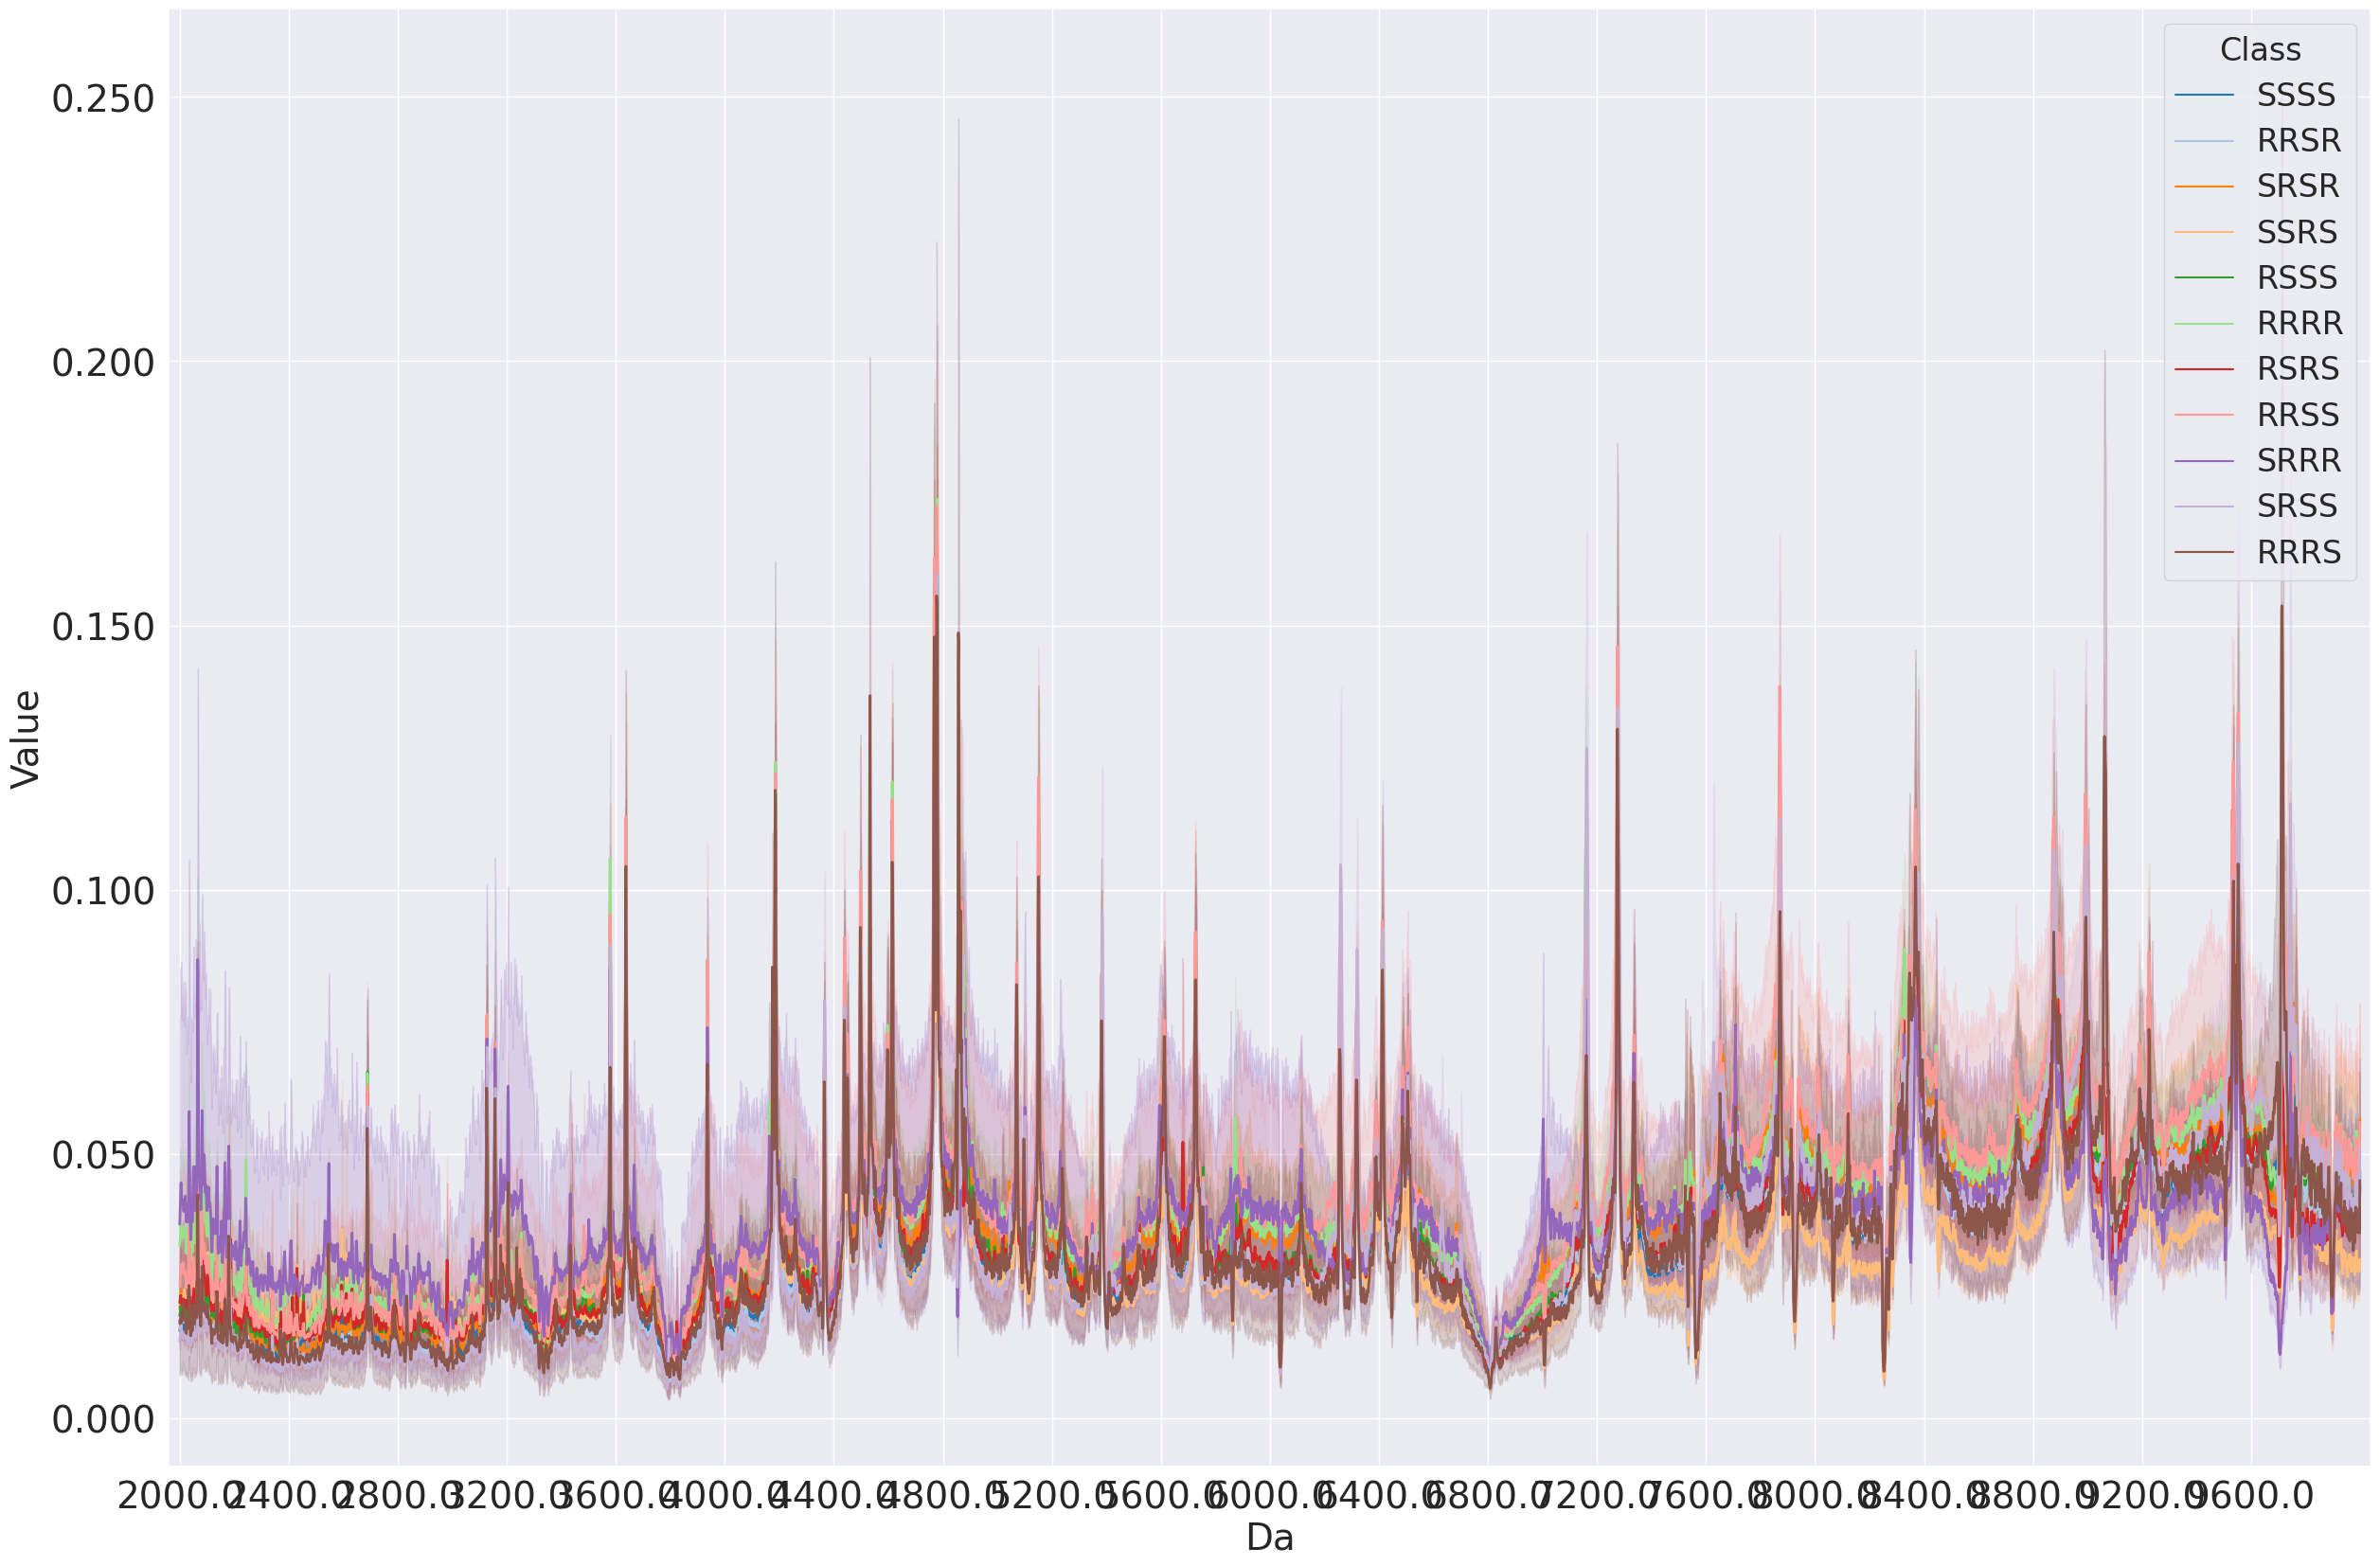

In [18]:
fig, axes = plt.subplots(figsize=(30, 20))

line = sns.lineplot(data=meltdata_lps, x="Da", y="Value", hue="Class", linewidth=linewidth, palette=palette)
line.set(xticks=np.arange(lower_limit, upper_limit, jump))
line.set_xlabel("Da", fontsize=label_size)
line.set_ylabel("Value", fontsize=label_size)

line.set_xticklabels(axes.get_xticks(), size=axis_tick_size)
ticks_loc = axes.get_yticks()
axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axes.set_yticklabels([y_label_format.format(x) for x in ticks_loc], size=axis_tick_size)

plt.setp(line.get_legend().get_texts(), fontsize=legend_size) 
plt.setp(line.get_legend().get_title(), fontsize=legend_size) 

axes.margins(x=0.005)

## Scatter Plots

In [54]:
profile_lps = pd.DataFrame()
profile_lps["Class"] = train_bac[antibiotics].agg(''.join, axis=1)
profile_lps

,Class
0,SSSS
1,RRSR
2,SRSR
3,SSSS
4,SSRS
...,...
3686,SSSS
3687,RRSR
3688,SSRS
3689,SSSS


In [55]:
lc = LabelEncoder()
lc.fit(profile_lps.values.ravel())
profile_lps_lc = lc.transform(profile_lps.values.ravel())
profile_lps_lc

array([10,  2,  7, ...,  9, 10,  3])

In [61]:
np.unique(profile_lps_lc).size

11

In [21]:
for i in range(class_count):
    print(str(i)+":", lc.inverse_transform([i]))

0: ['RRRR']
1: ['RRRS']
2: ['RRSR']
3: ['RRSS']
4: ['RSRS']
5: ['RSSS']
6: ['SRRR']
7: ['SRSR']
8: ['SRSS']
9: ['SSRS']
10: ['SSSS']


### PCA

In [62]:
pca = PCA(n_components=2, random_state=0)
pca.fit(malditof)
maldi_pca = pca.transform(malditof)

In [63]:
print("Variance of each column:", pca.explained_variance_ratio_)
print("Total:", pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

Variance of each column: [0.69896569 0.08981106]
Total: 0.7887767491519498


[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6'), Text(0, 0, '7'), Text(0, 0, '8'), Text(0, 0, '9'), Text(0, 0, '10')]


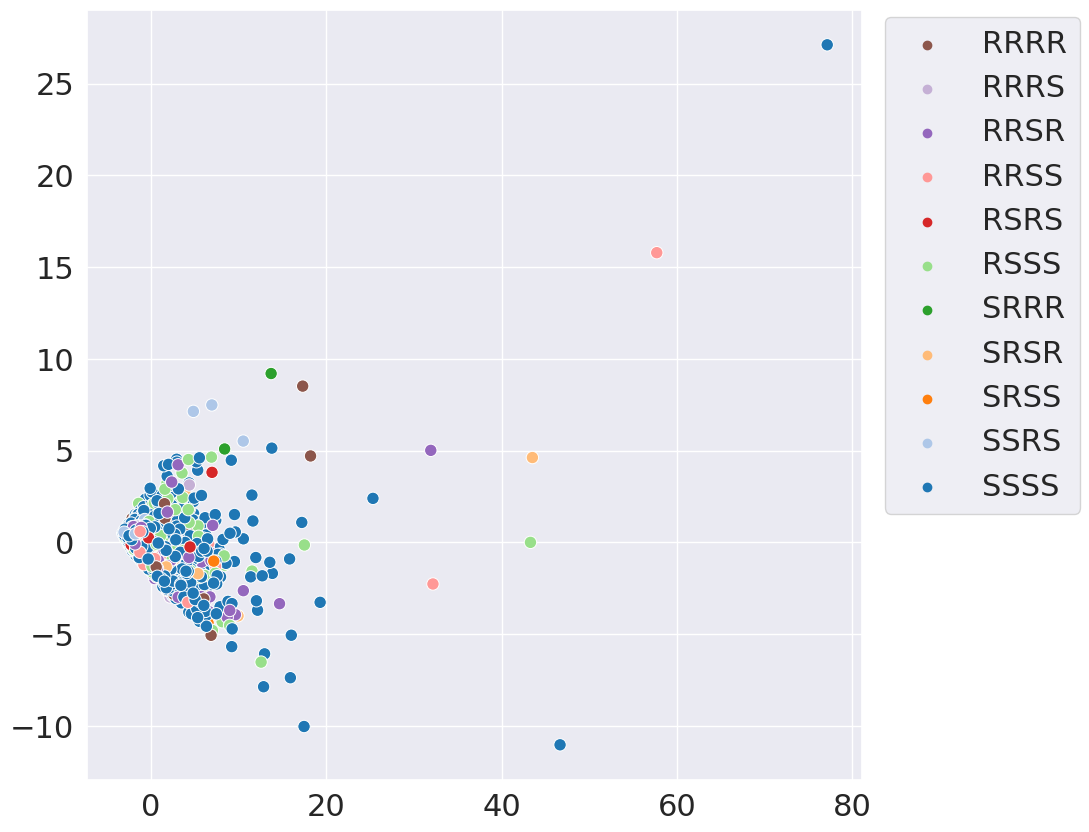

In [70]:
fig, axes = plt.subplots(figsize=(10, 10))

s = sns.scatterplot(x=maldi_pca[:, 0], y=maldi_pca[:, 1], hue=profile_lps_lc, s=80, palette=palette[::-1])

plt.setp(s.get_legend().get_texts(), fontsize="16") 
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))

print(s.legend_.texts)
for t, l in zip(s.legend_.texts, lc.inverse_transform(range(class_count))):
    t.set_text(l)

### T-SNE

In [79]:
def perform_tsne(x, y, perplexities, n_iter=1000):
    class_count = np.unique(y).size

    for index,perplexity in enumerate(perplexities):
        print("\nPerforming tsne with perplexity {} and with {} iterations at max".format(perplexity, n_iter))
        x_reduced = TSNE(verbose=0, perplexity=perplexity, n_jobs=-1, learning_rate=200.0, init="random", random_state=0).fit_transform(x)
        df = pd.DataFrame({"x":x_reduced[:,0], "y":x_reduced[:,1] , "label":y})

        fig, axes = plt.subplots(figsize=(10, 10))

        s = sns.scatterplot(data=df, x="x", y="y", hue=y, s=50, palette=palette[::-1])
        s.set(xlabel=None)
        s.set(ylabel=None)

        plt.setp(s.get_legend().get_texts(), fontsize="16") 
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.01))

        for t, l in zip(s.legend_.texts, lc.inverse_transform(range(class_count))):
            t.set_text(l)
        plt.show()
        print("Done")


Performing tsne with perplexity 20 and with 1000 iterations at max


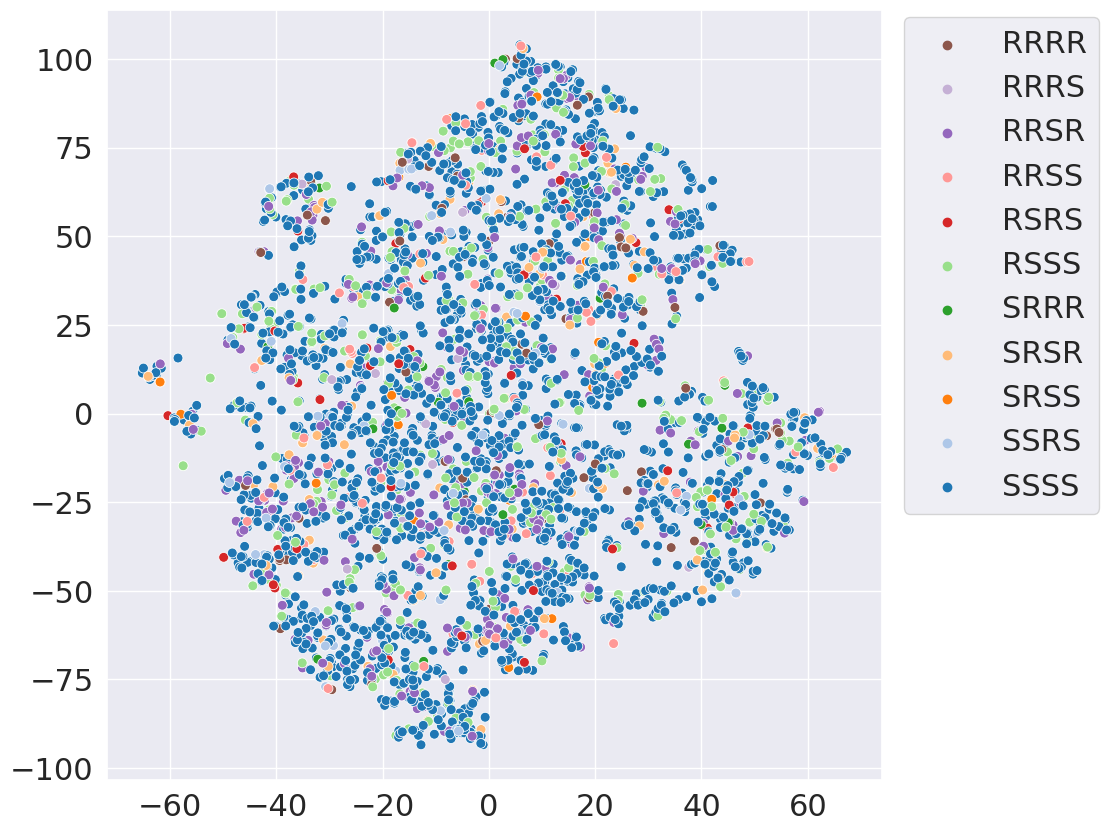

Done


In [80]:
perform_tsne(x=malditof, y=profile_lps_lc, perplexities=[20])